<a href="https://colab.research.google.com/github/Neoders74/Codigo_Facilito/blob/main/CF_Proyecto_final_Alejandro_Paz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Codigo Facilito**

---
**Trabajo Final de Bootcamp de Ciencia de Datos 3ra Generacion**
---








La Diabetes esta entre las enfermedades cronicas mas prevalentes del mundo, impactando a millones de personas cada año y demandando una inversion significativa del presupuesto de los paises del mundo.

La Diabetes es una enfermedad cronica en la cual los individuos pierden la capacidad de regular efectivamente sus niveles de glucosa en sangre, lo que lleva a una reduccion en la calidad y expectativa de vida. Posterior a la digestion, el azucar derivado de la fragmentacion de los alimentos entra en el torrente sanguineo. Esto da una señal al pancreas para liberar insulina, la cual ayuda a las celulas del cuerpo a utilizar esos azucares para generar energia. La Diabetes se caracteriza por imposibilidad de producir la suficiente insulina necesaria para metabolizar ese azucar en sangre o la incapacidad de utilizar la insulina ya existente de manera efectiva.

Complicaciones como enfermedad cardiaca, perdida de la vision, amputacion de miembros inferiores y enfermedad renal se asocian con altos niveles de azucar en sangre sostenidos en el tiempo de manera cronica. Si bien no hay cura para la diabetes, estrategias como la perdida de peso, alimentacion saludable, vida activa y tratamientos farrmacologicos pueden mitigar los perjuicios de esta enfermedad en muchos pacientes.

El diagnostico temprano puede llevar a cambios en el estilo de vida y tratamientos mas efectivos, haciendo que la creacion de modelos predictivos para el riesgo de diabetes, una herramienta clave para el publico y los agentes de salud de una nacion.

Con el siguiente dataset se busca evaluar las relaciones de correlacion y probable causalidad entre distintos factores de riesgo que puedan determinar la presencia de diabetes actual o en un futuro.

Se presentan las variables HighBP (Presion Arterial Elevada); HighCol (Colesterol Elevado); BMI (Indice de Masa Corporal); Smoker (Tabaquismo); PhysActivity (Actividad Fisica); Sex (Sexo); Age (Edad); Income (Ingreso); Education (Educacion); entre otras.

Nuestro objetivo sera buscar correlaciones y causalidades entre estas variables, definir un modelo predictivo en el cual ingresando estos datos se pueda predecir con el menor margen de error, la probabilidad de que el paciente tenga diabetes en el presente o en un futuro, para poder incorporar lo mas tempranamente posible, las estrategias para disminuir el riesgo y las comorbilidades, eficazmente disminuyendo el impacto economico de la enfermedad en el pais.

Algunas de las hipotesis planteadas son las siguientes:

¿Que factores de riesgo son los mas relevantes en la aparicion de la diabetes?
¿Que factores protectores son los mas relevantes en la prevencion de la diabetes?
¿Se puede utilizar al dia de hoy un set de factores de riesgo para detectar de manera certera si el paciente tiene o tendra diabetes?

# Importacion de los Datos y Primeras visualizaciones relevantes

Como se menciona anteriormente, se carga el dataset a estudiar que toma las respuestas de 253680 pacientes evaluados en el CDC (Center of Disease Control and Prevention de los EEUU) del año 2015

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import warnings #Encontramos esta opcion para evitar que aparezcan "warnings" de Python
url ='https://raw.githubusercontent.com/AlanDemostenes/Data-Science-Coderhouse/main/diabetes_binary_health_indicators_BRFSS2015.csv'
diabetes = pd.read_csv(url,sep=',')
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Comenzamos con este primer grafico, para identificar rapidamente aquellas variables que tendrian mayor correlacion con el evento a estudiar (Presencia o no de Diabetes). Podemos observar que tanto la percepcion del individuo en su salud general (GenHlth con 0.29); presencia de hipertension arterial (HighBP con 0.26), Indice de Masa Corporal y Dificultad al Caminar (BMI y DiffWalk con 0.22 c/u), Hipercolesterolemia (HighChol con 0.20) y la Edad con antecedente de infarto de miocardio (Age y HeartDiseaseorAttack con 0.18 c/u) serian las variables con correlacion positiva mas relevantes. Por otro lado el Ingreso (Income con -0.16); Educacion (Education con -0.12) y Actividad Fisica (PhysActivity con -0.12) serian la variables con correlacion negativa mas relevante.

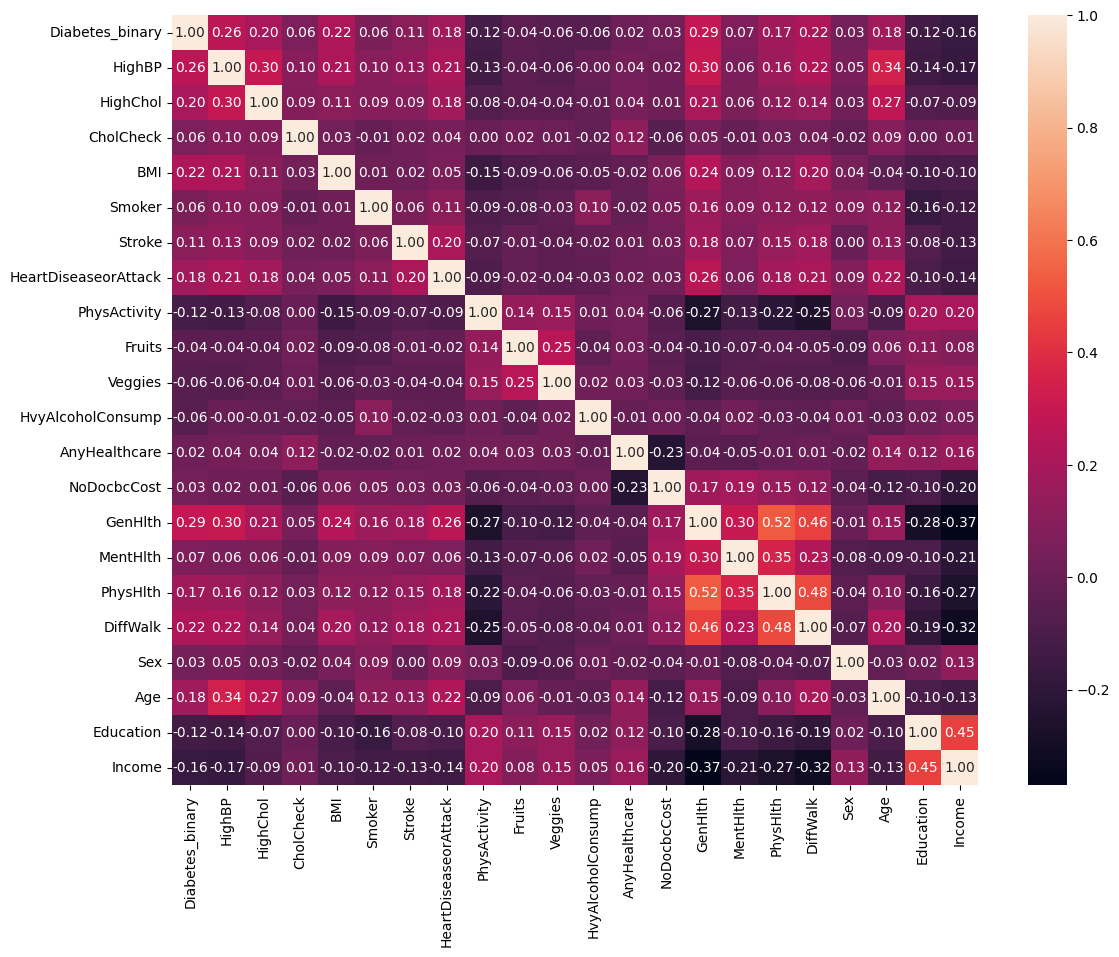

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(diabetes.corr(),annot=True, fmt = ".2f",);

El siguiente grafico se realiza puramente para determinar de manera alternativa al Heatmap, la correlacion de las variables con la presencia de diabetes.

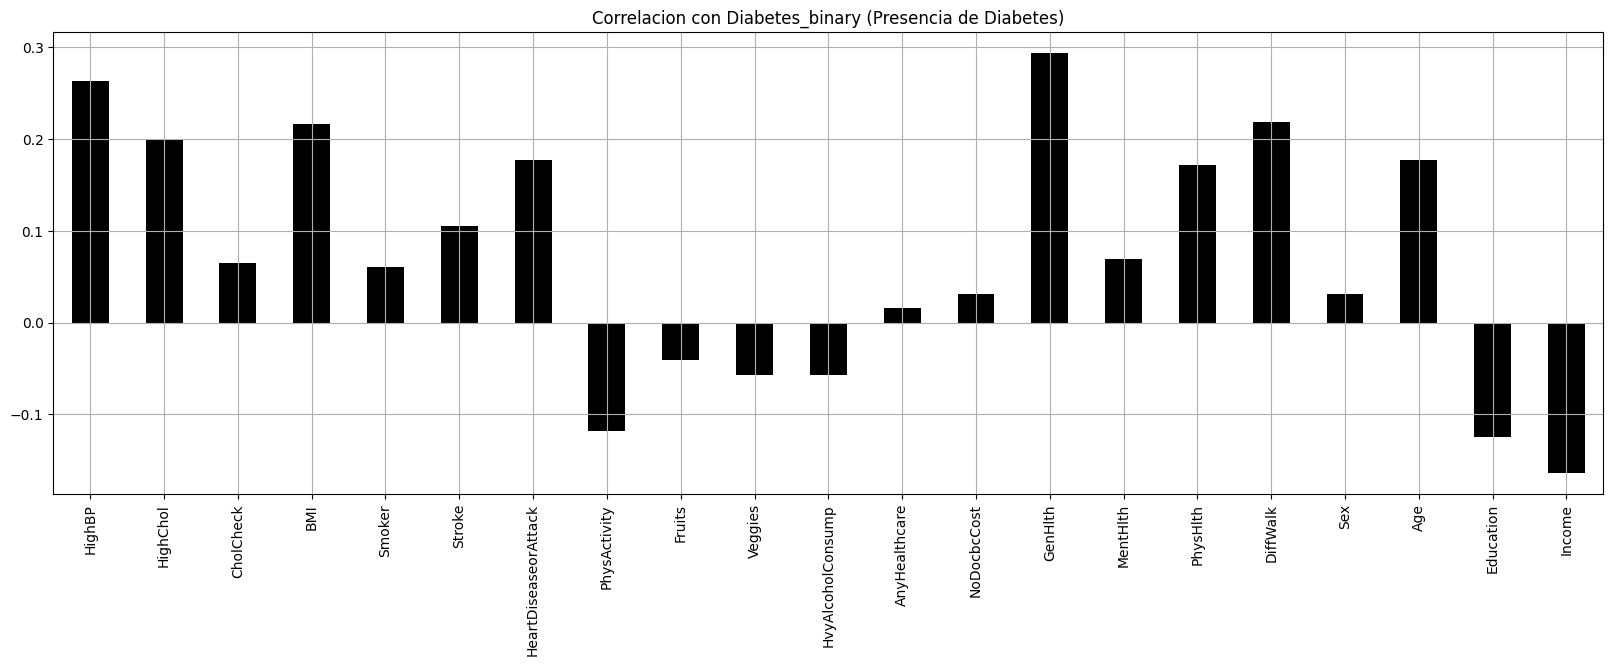

In [ ]:
diabetes.drop('Diabetes_binary', axis=1).corrwith(diabetes.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 6)
, title="Correlacion con Diabetes_binary (Presencia de Diabetes)",color="Black");

Comenzamos con el analisis de las variables involucradas evidenciadas en los graficos anteriores.

La primera de ellas, Hipertension arterial (HighBP). Utilizamos un replace para cambiar el valor de 0 y 1 en el conteo de Diabetes e Hipertension para que tengamos la leyenda "Diabetico/No diabetico - Hipertenso/Normotenso", puramente para que la lectura sea mas sencilla.

Realizando un conteo y multiplicacion porcentual, podemos evidenciar que el 75% de los diabeticos tienen Hipertension Arterial, mientras que los No Diabeticos solamente un 37% la presentan.

In [ ]:
visual_diab = diabetes.copy()

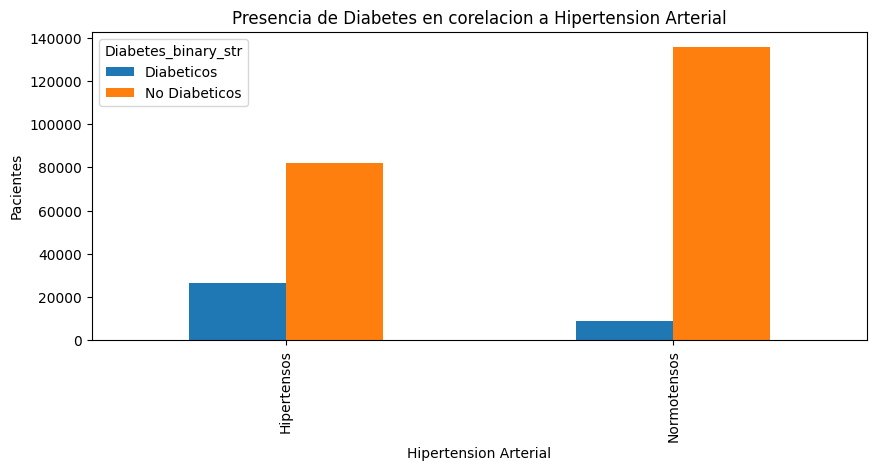

Diabetes_binary_str  HighBP_str 
Diabeticos           Hipertensos    75.267357
                     Normotensos    24.732643
No Diabeticos        Normotensos    62.339810
                     Hipertensos    37.660190
Name: HighBP_str, dtype: float64

In [ ]:
visual_diab["Diabetes_binary_str"]= visual_diab["Diabetes_binary"].replace({0:"No Diabeticos",1:"Diabeticos"})
visual_diab["HighBP_str"]= visual_diab["HighBP"].replace({0:"Normotensos",1:"Hipertensos"})
pd.crosstab(visual_diab.HighBP_str,visual_diab.Diabetes_binary_str)
pd.crosstab(visual_diab.HighBP_str,visual_diab.Diabetes_binary_str).plot(kind="bar",figsize=(10,4))

plt.title('Presencia de Diabetes en corelacion a Hipertension Arterial')
plt.xlabel("Hipertension Arterial")
plt.ylabel('Pacientes')
plt.show()

(visual_diab.groupby("Diabetes_binary_str")["HighBP_str"].value_counts()/visual_diab.groupby("Diabetes_binary_str")["HighBP_str"].count())*100

En el siguiente grafico unificamos las variables Colesterol alto (HighChol) y Hipertensionarterial (HighBP) para evidenciar el conjunto de las mismas y como afecta a la presencia o no de diabetes (Nuevamente, modificamos los "0" y "1" por las leyendas correspondientes para su mejor comprension). Con este grafico observamos que ambas variables en conjunto, cuando estan presentes, aumentan la probabilidad de aparicion de diabetes (Hipertensos con Hipercolesterolemia tienen un 29% de prevalencia de diabetes, mientras que Normotensos con Colesterol normal unicamente un 4%)

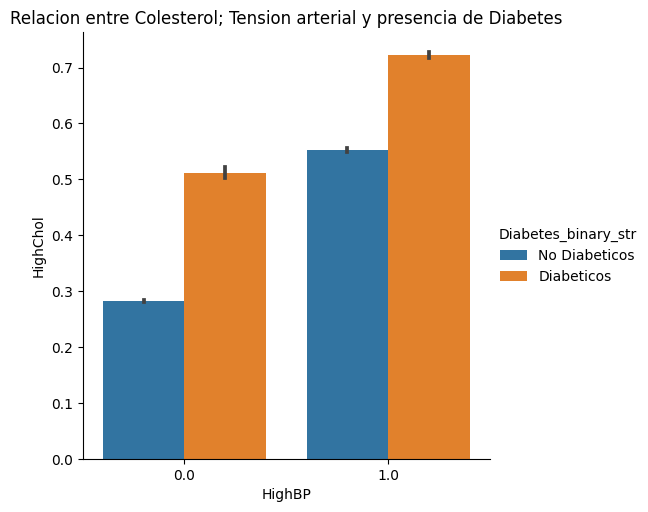

HighBP_str   HighChol_str         Diabetes_binary_str
Hipertensos  Colesterol Normal    No Diabeticos          83.266544
                                  Diabeticos             16.733456
             Hipercolesterolemia  No Diabeticos          70.286112
                                  Diabeticos             29.713888
Normotensos  Colesterol Normal    No Diabeticos          95.811421
                                  Diabeticos              4.188579
             Hipercolesterolemia  No Diabeticos          89.580955
                                  Diabeticos             10.419045
dtype: float64

In [ ]:
visual_diab["HighChol_str"]= visual_diab["HighChol"].replace({0:"Colesterol Normal",1:"Hipercolesterolemia"})
sns.catplot(x="HighBP" , y ="HighChol" , data = visual_diab , hue="Diabetes_binary_str" , kind="bar" );
plt.title("Relacion entre Colesterol; Tension arterial y presencia de Diabetes")
plt.show()

(visual_diab.groupby(["HighBP_str" , "HighChol_str"])["Diabetes_binary_str"].value_counts()/visual_diab.groupby(["HighBP_str" , "HighChol_str"])["Diabetes_binary"].count())*100

# Exploratory Data Analysis (EDA)

**Analisis** **Descriptivo**

> Analisis Univariado de los datos


Conteo de pacientes con diabetes

1.0     35346
0.0    218334
Name: Diabetes_binary, dtype: int64
1.0    13.933302%
0.0    86.066698%
Name: Diabetes_binary, dtype: object



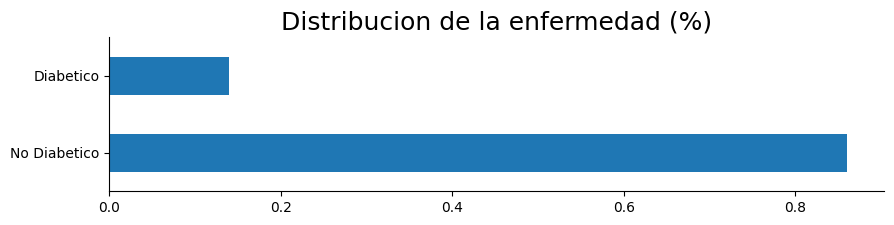

In [ ]:
print(diabetes['Diabetes_binary'].value_counts(ascending=True))
print(diabetes['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
diabetes['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Distribucion de la enfermedad (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['No Diabetico', 'Diabetico']);

El numero de pacientes con diabetes es menor al 20%

---






Clasificacion de pacientes por su sexo

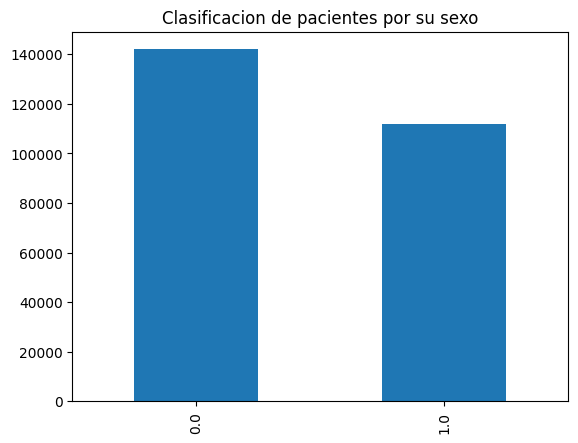

In [ ]:
diabetes['Sex'].value_counts().plot(kind='bar')
plt.title("Clasificacion de pacientes por su sexo");

Tenemos mas pacientes mujeres que varones




---



Tendencia de BMI de los respondientes (Indice de Masa Corporal)

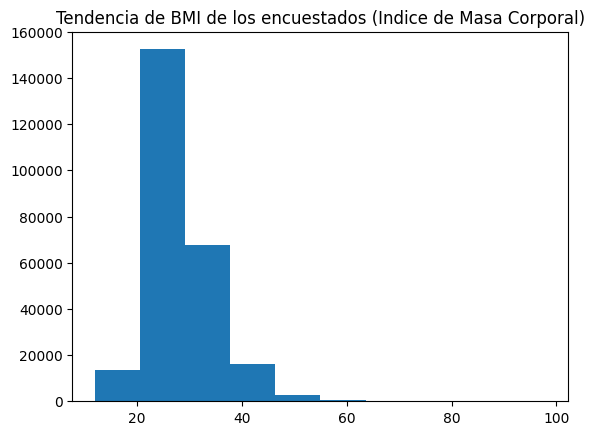

In [ ]:
plt.hist(diabetes['BMI'], bins=10)
plt.title("Tendencia de BMI de los encuestados (Indice de Masa Corporal)");

Hay una propension de IBM en el rango de 20-30 entre los encuestados

Aumentamos la informacion acerca del Indice de masa corporal y graficamos una distribucion de la misma, relacionando ademas, pacientes positivos y negativos de Diabetes

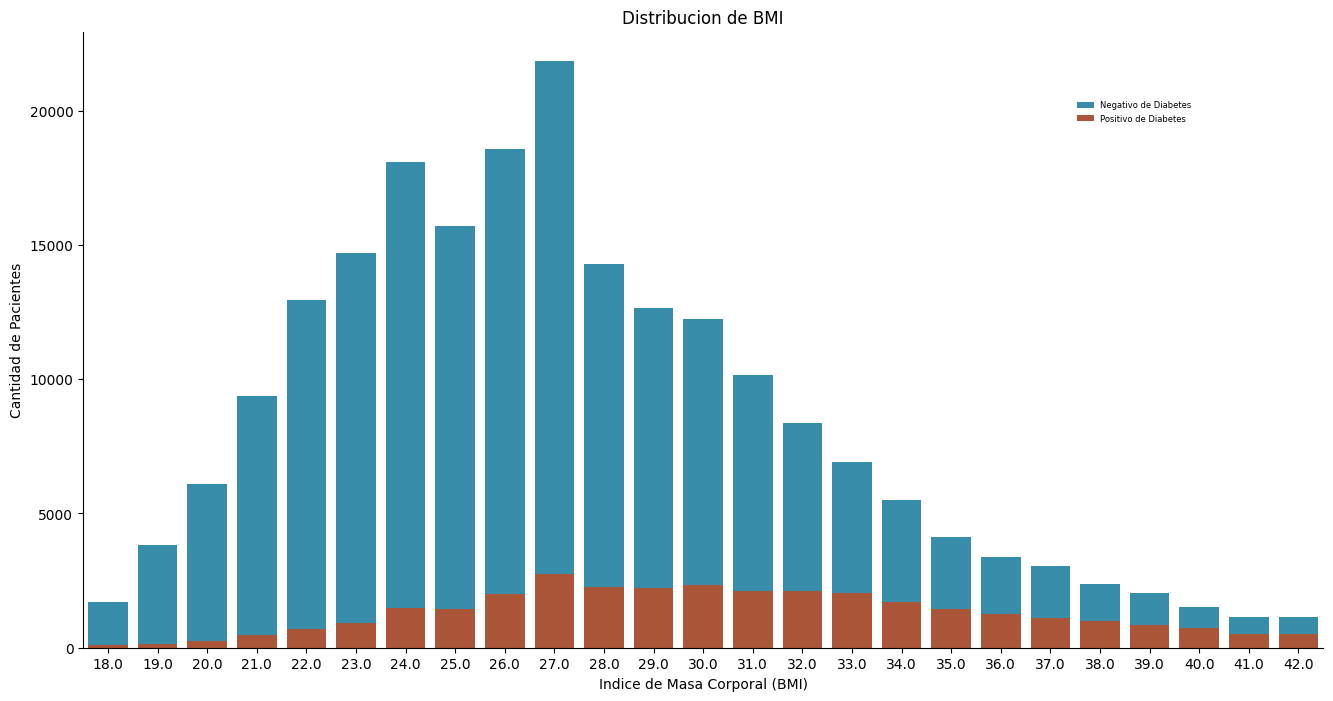

In [ ]:
ratio = 8
plt.figure(figsize=(ratio*2,ratio))
colors = ['#be4d25','#2596be']

BMI_2 = diabetes.iloc[np.where((diabetes["BMI"]>17)&(diabetes["BMI"]<=42))]
BMI_2 = pd.DataFrame(BMI_2)
warnings.filterwarnings('ignore')

sns.countplot(x=(BMI_2[BMI_2['Diabetes_binary']==False]['BMI']), color=colors[1], label="Negativo de Diabetes")
sns.countplot(x=(BMI_2[BMI_2['Diabetes_binary']==True]['BMI']), color=colors[0], label="Positivo de Diabetes" )
sns.despine()
plt.title("Distribucion de BMI", size=12)
plt.xlabel('Indice de Masa Corporal (BMI)')
plt.xticks(rotation=0)
plt.ylabel('Cantidad de Pacientes')
plt.legend(bbox_to_anchor=(.9, .9, 0, 0),shadow=False, frameon=False, prop={'size':6});

¿Cómo se interpreta el IMC para adultos?

De acuerdo con el Ministerio de Salud:

Para adultos de 20 años o más, el IMC se interpreta utilizando categorías de estado de peso estándar.

Estas categorías son las mismas para hombres y mujeres de todos los tipos de cuerpo y edades.

.

Si su IMC es inferior a 18,5, se encuentra dentro del rango de bajo peso.

Si su IMC es de 18,5 a 24,9, se encuentra dentro del rango de peso saludable.

Si su IMC es de 25,0 a 29,9, se encuentra dentro del rango de sobrepeso.

Si su IMC es 30.0 o superior, se encuentra dentro del rango de obesidad.

.

Se creó una nueva columna con estos nombres de rango.

In [ ]:
#create new binned column
bins = [0, 18.5, 24.9, 29.9, float('inf')]
visual_diab['BMI_bins'] = pd.cut(visual_diab['BMI'], bins=bins, labels=labels) #Por alguna razon, a veces hay que alternar y ejecutar esta celda y la siguiente mas de una vez

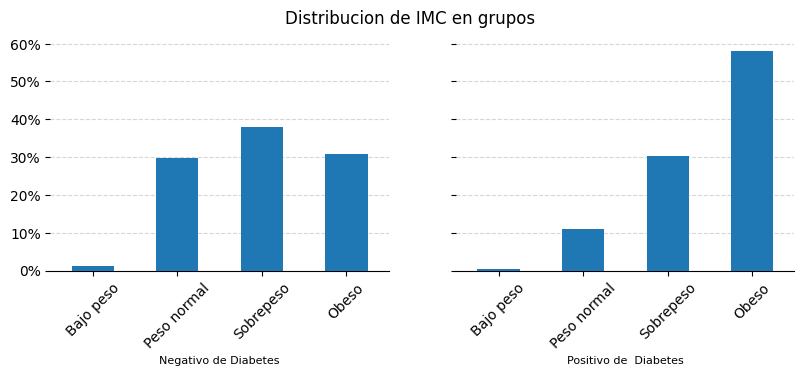

In [ ]:
labels = ['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obeso']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), sharey=True)
fig.suptitle('Distribucion de IMC en grupos')

(visual_diab[visual_diab['Diabetes_binary']==False]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Negativo de Diabetes',size=8)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set_xticklabels(labels)
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

(visual_diab[visual_diab['Diabetes_binary']==True]['BMI_bins']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('Positivo de  Diabetes',size=8)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.set_xticklabels(labels)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45);

El análisis indica que no existe una correlación significativa entre los intervalos de IMC y el grupo sin diabetes, mientras que se observó una fuerte correlación positiva entre la diabetes y la obesidad.



---



Distribucion de pacientes por genero

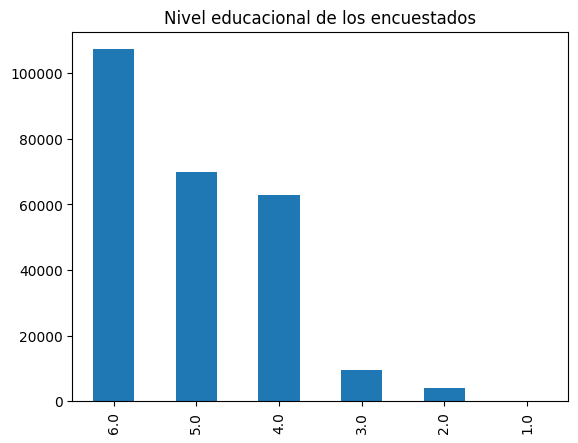

In [ ]:
diabetes['Education'].value_counts().plot(kind='bar')
plt.title("Nivel educacional de los encuestados");

Muchos de los encuestados tienen un buen nivel educacional


---



> Analisis Bivariado de los datos




Distribucion de pacientes por genero

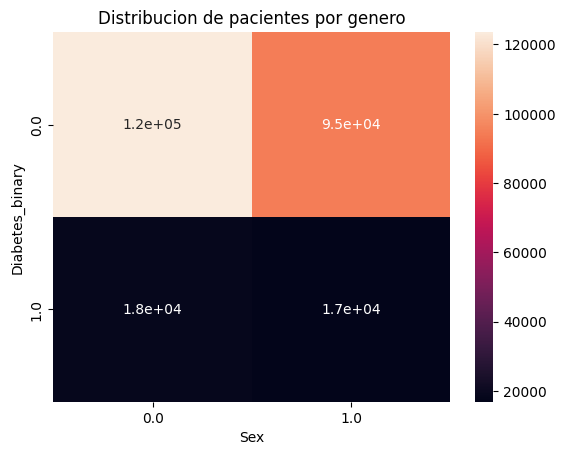

In [ ]:
#Grafico confeccionado buscando en la web maneras de uso de Heatmap en analisis bivariado
sns.heatmap(pd.crosstab(diabetes['Diabetes_binary'], diabetes['Sex']), annot=True)
plt.title("Distribucion de pacientes por genero");

El genero de los encuestado parece balanceado

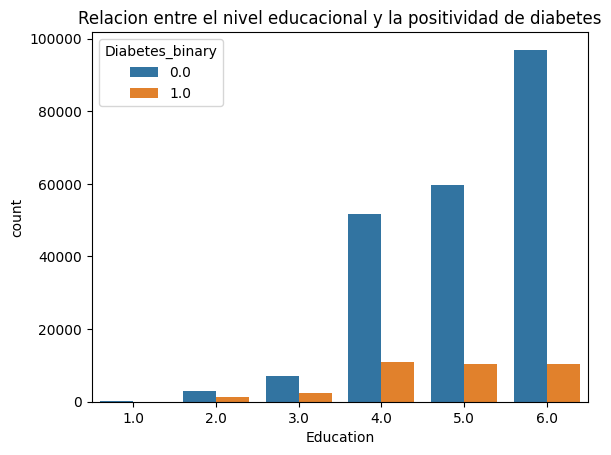

In [ ]:
sns.countplot(x='Education', hue='Diabetes_binary', data=visual_diab)
plt.title("Relacion entre el nivel educacional y la positividad de diabetes");

El nivel educativo del encuestado no es realmente determinante para no tener diabetes.


---



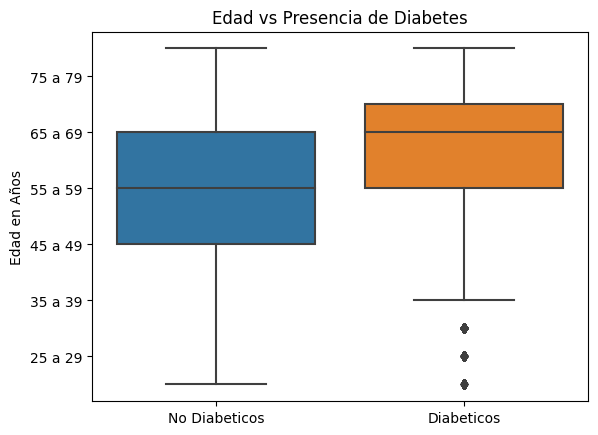

In [ ]:
sns.boxplot(x = 'Diabetes_binary_str', y = 'Age', data = visual_diab)
plt.yticks([2, 4, 6, 8, 10, 12], ['25 a 29', '35 a 39', '45 a 49', '55 a 59', '65 a 69', '75 a 79'])
plt.ylabel ('Edad en Años')
plt.xlabel ('')
plt.title('Edad vs Presencia de Diabetes')
plt.show()

Se puede visualizar que a mayor edad aumenta los casos de pacientes diabeticos.

In [ ]:
#Agrupacion de Variables

target = 'Diabetes_binary'
variables_Binarias = (diabetes.nunique()[diabetes.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
variables_numericas = [var for var in diabetes.columns if var not in variables_Binarias and var != 'Diabetes_binary']
variables_numericas

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [ ]:
variables_Binarias

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

**EDA Variables Numericas**

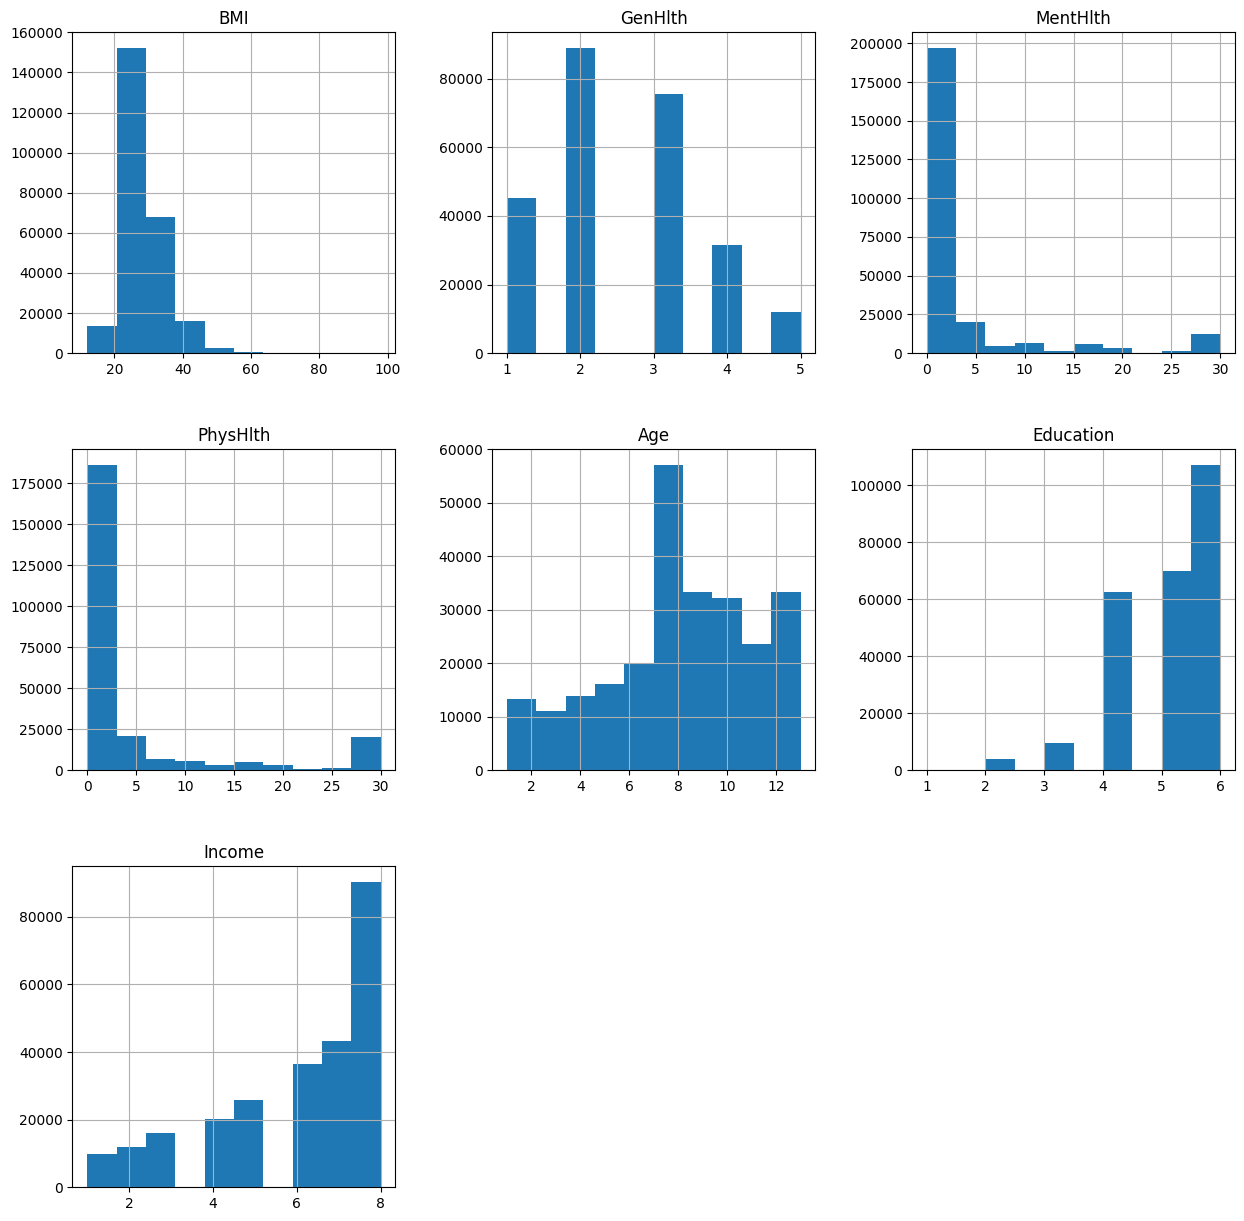

In [ ]:
diabetes[variables_numericas].hist(figsize=(15,15));

# Data Wrangling

In [ ]:
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
diabetes.shape

(253680, 22)

In [ ]:
diabetes.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Se puede apreciar que el dataset, a pesar de contener categorias del tipo categoricas (realizando una clasificacion binaria de sus valores No Numericos), posee datos en sus columnas del tipo numerico

In [ ]:
diabetes.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


**Datos Nulos**

Buscamos los datos nulos que existen en cada columna de DF


In [ ]:
datos_nulos = diabetes.isnull()
datos_nulos.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
diabetes.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Valores extremos u outliers**

Verificamos las variables en busqueda de outliers

<Axes: >

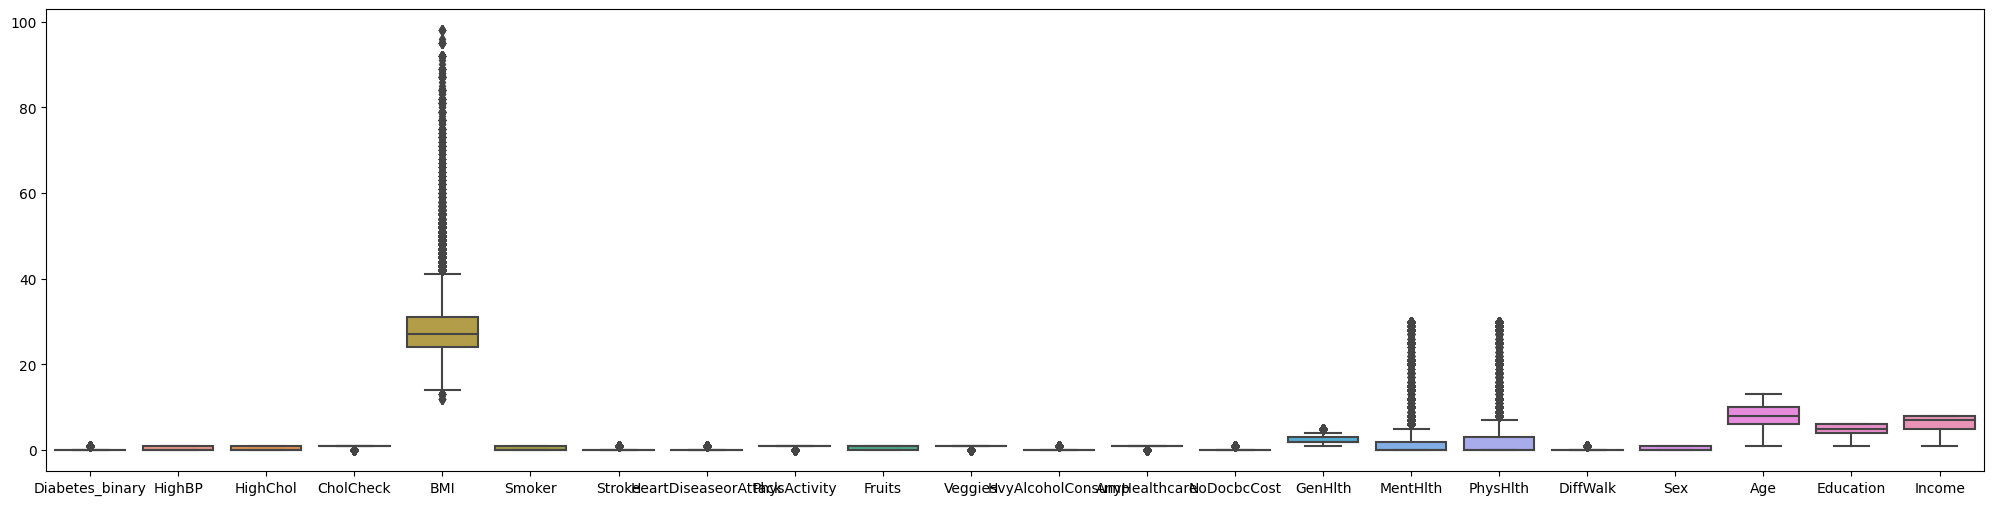

In [ ]:
#Con Atipicos
plt.figure(figsize=(25,6))
sns.boxplot(data=diabetes)


En un principio, no se puede determinar si los datos outliers de la variable BMI afectaran al modelo a aplicar. Es por ello que los dejaremos como estan, hasta ver la eficiencia del modelo a implementar.

## Correlacion

Para terminar nuestro análisis, veremos la correlación de nuestras variables para ver como se relacionan entre ellas.

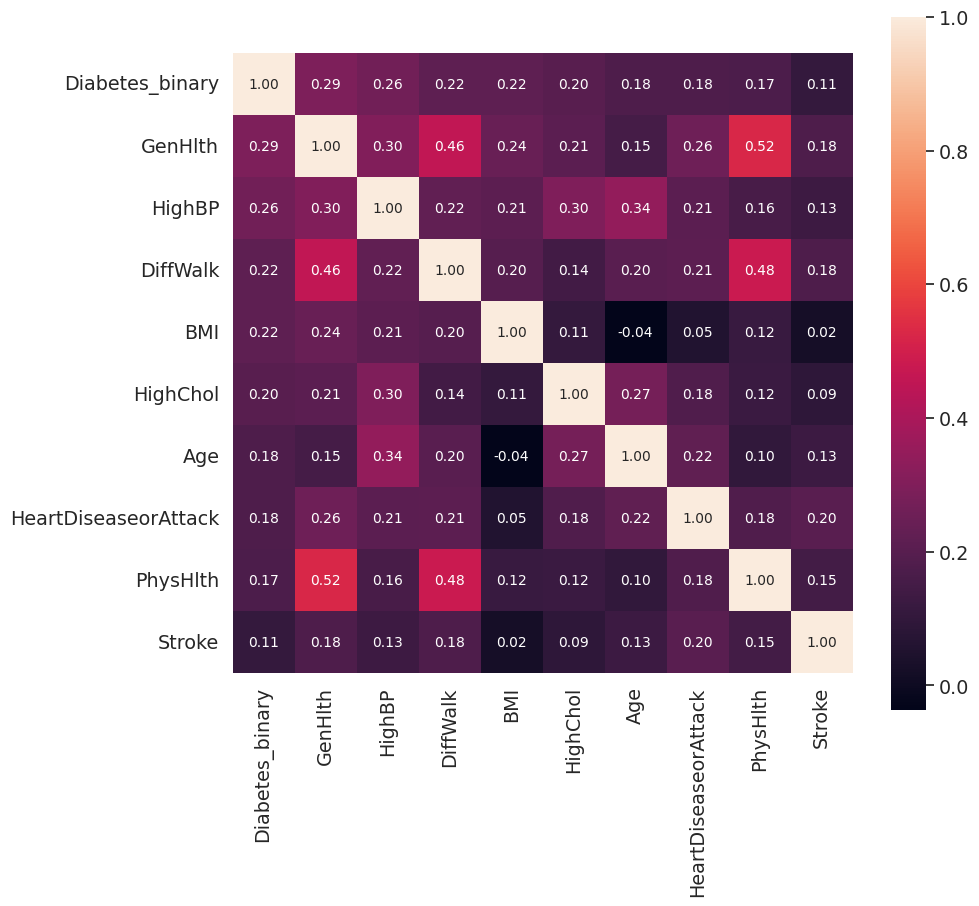

In [ ]:
correlacionMath = diabetes.corr()
k=10

#Obtener nombre de columnas
columnas= correlacionMath.nlargest(k,'Diabetes_binary')['Diabetes_binary'].index

#Se calcula el coeficiente de correlación
cm = np.corrcoef(diabetes[columnas].values.T)

sns.set(font_scale=1.25)

f,ax = plt.subplots(figsize=(10,9))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True, fmt=".2f",annot_kws={'size': 10}, yticklabels=columnas.values,xticklabels=columnas.values)


# Feature Selection

In [ ]:
# Lista de columnas ordenadas por correlacion
l_corr = (diabetes.drop('Diabetes_binary', axis=1)
   .corrwith(diabetes.Diabetes_binary)
   .abs()
   .sort_values(ascending=False))
l_corr

GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Income                  0.163919
Education               0.124456
PhysActivity            0.118133
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
HvyAlcoholConsump       0.057056
Veggies                 0.056584
Fruits                  0.040779
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
dtype: float64

In [ ]:
l_corr[l_corr > 0.05]

GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Income                  0.163919
Education               0.124456
PhysActivity            0.118133
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
HvyAlcoholConsump       0.057056
Veggies                 0.056584
dtype: float64

Coeficientes de correlación ordenados en orden decreciente.

Si establecemos un umbral de 0,05, las columnas inferiores a "fumador" (Smoker) quedan fuera.


In [ ]:
X = diabetes.drop('Diabetes_binary', axis=1)
y = diabetes.Diabetes_binary

Este conjunto de datos no tiene valores negativos. Contiene casi solo características categóricas. Usaré Chi² en esta situación.

In [ ]:
from sklearn.feature_selection import SelectPercentile, chi2, mutual_info_classif
f_score = chi2 (X, y)

chisquare = pd.DataFrame(f_score).T.set_index(X.columns).rename(columns={0:'ChiSqr_Score', 1:"ChiSqr_pValue"})
chi2_list = chisquare.sort_values(by='ChiSqr_Score', ascending=False)
chi2_list

,ChiSqr_Score,ChiSqr_pValue
PhysHlth,133424.406534,0.000000e+00
MentHlth,21029.632228,0.000000e+00
BMI,18355.166400,0.000000e+00
DiffWalk,10059.506391,0.000000e+00
HighBP,10029.013935,0.000000e+00
GenHlth,9938.507776,0.000000e+00
Age,9276.141199,0.000000e+00
HeartDiseaseorAttack,7221.975378,0.000000e+00
HighChol,5859.710582,0.000000e+00
Income,4829.816361,0.000000e+00


In [ ]:
#por encima del umbral de 250 chi².
chisquare[chisquare['ChiSqr_Score']>250].index.to_list()

['HighBP',
 'HighChol',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'HvyAlcoholConsump',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income']

Estas son las 16 funciones principales que utilizan la estadística chi2 (Chi Square)



---



# Creacion del Modelo

Ahora que se realizó el EDA, necesitamos construir un modelo para predecir si un paciente con estos datos es o no diabético.

Entrenaremos el modelo en una selección de este conjunto de datos (X_train), probaremos en partes separadas del mismo conjunto de datos que el modelo no vio durante el entrenamiento (X_test)

### Árbol de Decisión de Clasificación


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
# Lista de columnas surgidas del Chi2 Feature Selection
lista_columnas = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = diabetes[lista_columnas]
y = diabetes['Diabetes_binary']

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.8607 y el AUC es 0.5000 en el dataset


El conjunto de datos está desequilibrado, por lo que adivinar que no es diabético tiene más posibilidades que ser diabético.

In [ ]:
#Elijo balancear los datos y encuentro en la libreria Imbalanced-learn una buena opcion para trabajar
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importamos SMOTE para el balanceo de los datos
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

0.0    218334
1.0    218334
Name: Diabetes_binary, dtype: int64

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.5000 y el AUC es 0.5000 en el dataset


In [ ]:
#Importamos la libreria para separar en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Importamos el modelo

from sklearn.tree import DecisionTreeClassifier
arbol_de_decision = DecisionTreeClassifier()

In [ ]:
#Entrenamos el modelo
arbol_de_decision.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecisionTreeClassifier(max_depth=1,random_state=42)

y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_decisionTree = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_decisionTree)

% de aciertos sobre el set de entrenamiento: 0.9901893429333041
% de aciertos sobre el set de evaluación: 0.8780950287174696


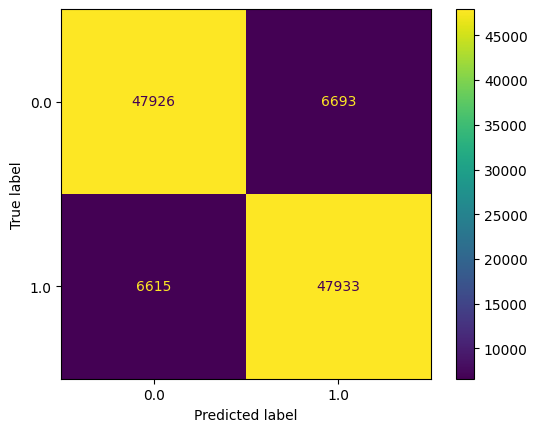

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mtx = confusion_matrix(y_test, y_test_pred, labels= arbol_de_decision.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx, display_labels=arbol_de_decision.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.9833990695175412
% de recall sobre el set de evaluación: 0.8787306592359023
Precisión:
% de precisión sobre el set de entrenamiento: 0.996942331379479
% de precisión sobre el set de evaluación: 0.8774759272141471
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.9901243902663925
% de f1_score sobre el set de evaluación: 0.8781028449997251


In [ ]:
ResultadosModelos = pd.DataFrame(columns=['Modelo', 'Aciertos Training', 'Aciertos Test', 'F1-Score', 'Precision','Sensibilidad'])
ResultadosModelos = ResultadosModelos.append({'Modelo': 'Decision Tree', 'Aciertos Training':'0.9901', 'Aciertos Test':'0.8781', 'F1-Score':'0.87','Precision':'0.87','Sensibilidad':'0.87'}, ignore_index=True)

<ipython-input-175-fd60c339d0ce>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ResultadosModelos = ResultadosModelos.append({'Modelo': 'Decision Tree', 'Aciertos Training':'0.9901', 'Aciertos Test':'0.8781', 'F1-Score':'0.87','Precision':'0.87','Sensibilidad':'0.87'}, ignore_index=True)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.score(X_test, y_test)

0.8367272161001035

In [ ]:
print(" Resultados desde Grid Search " )
print("\n El mejor estimador de TODOS los parametros buscados:\n",grid_search_cv.best_estimator_)
print("\n El mejor score de TODOS los parametros buscados:\n",grid_search_cv.best_score_)
print("\n Los mejores parametros de todos los buscados:\n",grid_search_cv.best_params_)

 Resultados desde Grid Search 

 El mejor estimador de TODOS los parametros buscados:
 DecisionTreeClassifier(max_leaf_nodes=99, random_state=42)

 El mejor score de TODOS los parametros buscados:
 0.8344005056473108

 Los mejores parametros de todos los buscados:
 {'max_leaf_nodes': 99, 'min_samples_split': 2}


In [ ]:
dt = DecisionTreeClassifier(max_leaf_nodes=99, random_state=42)
dt.fit(X_train , y_train)
y_pred=dt.predict(X_test)
print('Score Entrenamiento: {:.4f}'.format(dt.score(X_train, y_train)))
print('Score Prueba: {:.4f}'.format(dt.score(X_test, y_test)))
matrix = classification_report(y_test,y_pred )
print(matrix)

Score Entrenamiento: 0.8364
Score Prueba: 0.8367
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84     54619
         1.0       0.87      0.79      0.83     54548

    accuracy                           0.84    109167
   macro avg       0.84      0.84      0.84    109167
weighted avg       0.84      0.84      0.84    109167



In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'Decision Tree GridSearchCV', 'Aciertos Training':'0.8364', 'Aciertos Test':'0.8367', 'F1-Score':'0.84','Precision':'0.87','Sensibilidad':'0.79'}, ignore_index=True)

<ipython-input-176-0c9abab395bc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ResultadosModelos = ResultadosModelos.append({'Modelo': 'Decision Tree GridSearchCV', 'Aciertos Training':'0.8364', 'Aciertos Test':'0.8367', 'F1-Score':'0.84','Precision':'0.87','Sensibilidad':'0.79'}, ignore_index=True)


El primer modelo a utilizar fue el de Árbol de Decisión y logro un accuracy del 87% en nuestro set de evaluación. Con el GridSearch los valores no fueron mejores, logrando un Accuracy del 84%.

Vamos a utilizar otros algoritmos para comparar la eficiencia de los algoritmos.


---



### Random Forest

In [ ]:
# Lista de columnas surgidas del Chi2 Feature Selection
lista_columnas = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = diabetes[lista_columnas]
y = diabetes['Diabetes_binary']

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.8607 y el AUC es 0.5000 en el dataset


In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

0.0    218334
1.0    218334
Name: Diabetes_binary, dtype: int64

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.5000 y el AUC es 0.5000 en el dataset


In [ ]:
#Separamos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
# Importamos el modelo
from sklearn.ensemble import RandomForestClassifier

#Creamos un random forest!
modelo = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=42)

In [ ]:
y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_randomForest = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_randomForest)

% de aciertos sobre el set de entrenamiento: 0.8710935233785546
% de aciertos sobre el set de evaluación: 0.8663515531250287


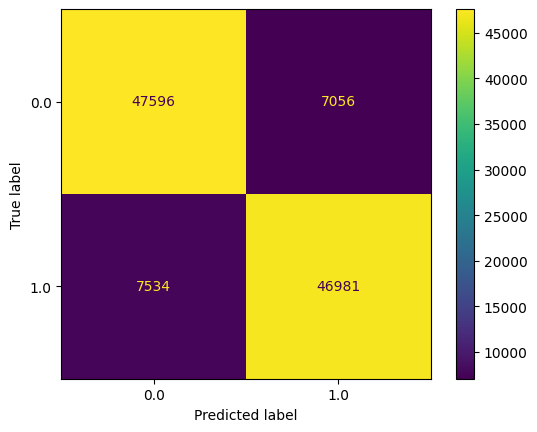

In [ ]:
conf_mtx = confusion_matrix(y_test, y_test_pred, labels= modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx, display_labels=modelo.classes_)
disp.plot();

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.8668103211471196
% de recall sobre el set de evaluación: 0.8617995047234706
Precisión:
% de precisión sobre el set de entrenamiento: 0.8743950048645919
% de precisión sobre el set de evaluación: 0.8694228028943132
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.8705861435792739
% de f1_score sobre el set de evaluación: 0.865594369518756


In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'Random Forest', 'Aciertos Training':'0.8710', 'Aciertos Test':'0.8663', 'F1-Score':'0.86','Precision':'0.87','Sensibilidad':'0.86'}, ignore_index=True)

<ipython-input-178-9019175409a8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ResultadosModelos = ResultadosModelos.append({'Modelo': 'Random Forest', 'Aciertos Training':'0.8710', 'Aciertos Test':'0.8663', 'F1-Score':'0.86','Precision':'0.87','Sensibilidad':'0.86'}, ignore_index=True)


El segundo modelo a utilizar fue el de Random Forest y logro un accuracy del 87% en nuestro set de evaluación.


---



### Regresión Logistica


In [ ]:
# Lista de columnas surgidas del Chi2 Feature Selection
lista_columnas = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = diabetes[lista_columnas]
y = diabetes['Diabetes_binary']

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.8607 y el AUC es 0.5000 en el dataset


In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

0.0    218334
1.0    218334
Name: Diabetes_binary, dtype: int64

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.5000 y el AUC es 0.5000 en el dataset


In [ ]:
#Separamos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Importamos la libreria del modelo
from sklearn.linear_model import LogisticRegression

# Instanciamos
regresion_logistica = LogisticRegression()

# Entrenamos la regresión logística con los datos de entrenamiento

#No tengo claro como resolver el error que me indica
regresion_logistica.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Prediccion en Train
y_train_pred = regresion_logistica.predict(X_train)

#Prediccion en Test
y_test_pred = regresion_logistica.predict(X_test)

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_regresion = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_regresion)

% de aciertos sobre el set de entrenamiento: 0.7499549619695818
% de aciertos sobre el set de evaluación: 0.752177855945478


In [ ]:
print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.7792790592602542
% de recall sobre el set de evaluación: 0.7811652122900932
Precisión:
% de precisión sobre el set de entrenamiento: 0.7361830493614959
% de precisión sobre el set de evaluación: 0.7381340077605322
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.7571182821212481
% de f1_score sobre el set de evaluación: 0.7590402223093091


In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'Regresion Logistica', 'Aciertos Training':'0.7499', 'Aciertos Test':'0.7521', 'F1-Score':'0.76','Precision':'0.73','Sensibilidad':'0.78'}, ignore_index=True)

<ipython-input-179-51a58ff1ea61>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ResultadosModelos = ResultadosModelos.append({'Modelo': 'Regresion Logistica', 'Aciertos Training':'0.7499', 'Aciertos Test':'0.7521', 'F1-Score':'0.76','Precision':'0.73','Sensibilidad':'0.78'}, ignore_index=True)


### KNN

In [ ]:
# Lista de columnas surgidas del Chi2 Feature Selection
lista_columnas = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = diabetes[lista_columnas]
y = diabetes['Diabetes_binary']

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.8607 y el AUC es 0.5000 en el dataset


In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

0.0    218334
1.0    218334
Name: Diabetes_binary, dtype: int64

In [ ]:
nodiabetic_acc = accuracy_score(y, np.zeros_like(y))
nodiabetic_uac = roc_auc_score(y, np.zeros_like(y))

print(f'La precision de 0 es {nodiabetic_acc:0.4f} y el AUC es {nodiabetic_uac:0.4f} en el dataset')

La precision de 0 es 0.5000 y el AUC es 0.5000 en el dataset


In [ ]:
#Separamos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
# Importamos el modelo
from sklearn.neighbors import KNeighborsClassifier

#Lo entrenamos
modelo = KNeighborsClassifier(n_neighbors= 6 )
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_train_pred = modelo.predict(X_train) #Prediccion en Train
y_test_pred = modelo.predict(X_test) #Prediccion en Test

In [ ]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_knn = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy_knn)

% de aciertos sobre el set de entrenamiento: 0.8857530206014638
% de aciertos sobre el set de evaluación: 0.842598953896324


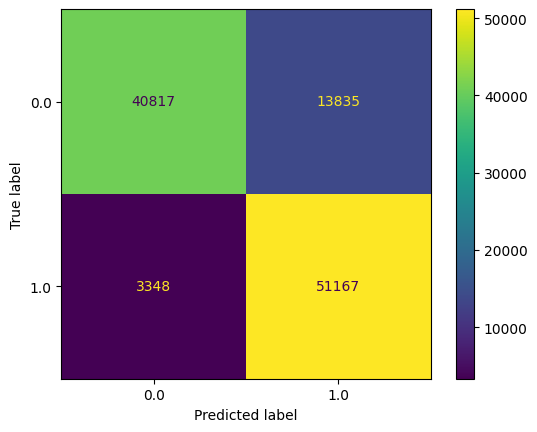

In [ ]:
conf_mtx = confusion_matrix(y_test, y_test_pred, labels= modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx, display_labels=modelo.classes_)
disp.plot();

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.9586739022946056
% de recall sobre el set de evaluación: 0.9385857103549482
Precisión:
% de precisión sobre el set de entrenamiento: 0.8367244732145236
% de precisión sobre el set de evaluación: 0.7871603950647672
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.8935575823438042
% de f1_score sobre el set de evaluación: 0.8562296577055984


In [ ]:
ResultadosModelos = ResultadosModelos.append({'Modelo': 'KNN', 'Aciertos Training':'0.8857', 'Aciertos Test':'0.8426', 'F1-Score':'0.85','Precision':'0.78','Sensibilidad':'0.94'}, ignore_index=True)

<ipython-input-180-c041f1422305>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ResultadosModelos = ResultadosModelos.append({'Modelo': 'KNN', 'Aciertos Training':'0.8857', 'Aciertos Test':'0.8426', 'F1-Score':'0.85','Precision':'0.78','Sensibilidad':'0.94'}, ignore_index=True)


# Comparacion de Modelos

Desplegamos los valores de cada modelo para compararlos

In [ ]:

print('% de aciertos sobre el set de evaluación del Árbol de decisión:',test_accuracy_decisionTree)
print('% de aciertos sobre el set de evaluación del Random Forest:',test_accuracy_randomForest)
print('% de aciertos sobre el set de evaluación de la Regresión Logistica:',test_accuracy_regresion)
print('% de aciertos sobre el set de evaluación de KNN:',test_accuracy_knn)

% de aciertos sobre el set de evaluación del Árbol de decisión: 0.8780950287174696
% de aciertos sobre el set de evaluación del Random Forest: 0.8663515531250287
% de aciertos sobre el set de evaluación de la Regresión Logistica: 0.752177855945478
% de aciertos sobre el set de evaluación de KNN: 0.842598953896324


Los 4 algoritmos presentan un accuaracy aceptable, sin embargo el algoritmo de Arbol de Decision fue el que tuvo mejor rendimiento por lo que, por el momento, es nuestra mejor opción para el proyecto.

 .
  


---



Sin embargo, ocuparemos un metodo para ver si podemos mejorar el rendimiento de nuestro algoritmo de Random Forest (mediante RandomSearchCV). Esto nos ayudara a encontrar el mejor conjunto de hyperparametros para nuestro modelo.

# Random Search CV

In [ ]:
import scipy as sp

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Lista de columnas surgidas del Chi2 Feature Selection
lista_columnas = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = diabetes[lista_columnas]
y = diabetes['Diabetes_binary']

In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

0.0    218334
1.0    218334
Name: Diabetes_binary, dtype: int64

In [ ]:
#Separamos en train y test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
#Creamos nuestro objeto Decision Tree
modelo = RandomForestClassifier(max_depth=12 ,n_estimators =10, random_state=42 )

In [ ]:
# Grilla para Random Search
param_dist = {'criterion': ['gini', 'entropy'],
              'max_depth': sp.stats.randint(1, 20),
              'min_samples_split': sp.stats.randint(1, 20),
              'random_state': sp.stats.randint(1, 20),
              'min_samples_leaf': sp.stats.randint(1, 20),
              'max_features': ['auto', 'sqrt', 'log2']}

#Aplicamos la grilla al modelo
modelo = RandomizedSearchCV(modelo, param_dist, n_iter=10, random_state=0, cv=5)

In [ ]:
#Entrenamos DecisionTree con la grilla definida arriba y CV con tamaño de Fold=5
modelo.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=12,
                                                    n_estimators=10,
                                                    random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fcf695e2610>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fcf6a911670>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fcf6a911b20>,
                                        'random_state': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fcf6978d8e0>},
                   random_state=0)

In [ ]:
print("Mejores parametros: "+str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

Mejores parametros: {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 4}
Mejor Score: 0.8841469224349584



In [ ]:
#Analizamos qué obtuvimos
scores = pd.DataFrame(modelo.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.128722,0.121125,0.099617,0.003463,gini,16,sqrt,1,4,4,"{'criterion': 'gini', 'max_depth': 16, 'max_fe...",0.882903,0.886305,0.884550,0.885191,0.881786,0.884147,0.001614,1
1,1.884062,0.084081,0.073611,0.004174,entropy,10,sqrt,19,5,7,"{'criterion': 'entropy', 'max_depth': 10, 'max...",0.849086,0.853832,0.854000,0.850885,0.849527,0.851466,0.002087,6
2,1.993023,0.158149,0.082036,0.001409,gini,13,log2,2,7,8,"{'criterion': 'gini', 'max_depth': 13, 'max_fe...",0.873055,0.872275,0.872992,0.874718,0.872412,0.873090,0.000870,4
3,2.246873,0.181237,0.087271,0.001650,entropy,15,auto,18,6,14,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.871987,0.874626,0.873939,0.875374,0.872275,0.873640,0.001316,3
4,1.703751,0.171351,0.070636,0.000920,gini,10,auto,17,6,16,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",0.851819,0.856137,0.851573,0.858000,0.856443,0.854794,0.002609,5
5,0.422685,0.005847,0.037918,0.000924,entropy,1,log2,4,18,15,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.759424,0.760779,0.759878,0.758595,0.754947,0.758724,0.002016,9
6,0.008540,0.000162,0.000000,0.000000,entropy,1,sqrt,10,1,11,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.996490,0.089852,0.052358,0.005443,gini,4,log2,12,19,3,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.801637,0.800641,0.804015,0.804000,0.801420,0.802343,0.001399,7
8,0.417038,0.007851,0.037587,0.000975,gini,1,auto,6,7,9,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.760813,0.763954,0.765527,0.766153,0.763038,0.763897,0.001897,8
9,2.210036,0.126804,0.096415,0.000986,gini,18,auto,10,11,2,"{'criterion': 'gini', 'max_depth': 18, 'max_fe...",0.882796,0.884260,0.883878,0.884947,0.880183,0.883213,0.001667,2


In [ ]:
#Prediccion
prediction = modelo.predict(X_test)
#Accuracy
print('Exactitud:', accuracy_score(y_test, prediction))

Exactitud: 0.8955178762812938


In [ ]:
ResultadosModelos

,Modelo,Aciertos Training,Aciertos Test,F1-Score,Precision,Sensibilidad
0,Decision Tree,0.9901,0.8781,0.87,0.87,0.87
1,Decision Tree GridSearchCV,0.8364,0.8367,0.84,0.87,0.79
2,Random Forest,0.8710,0.8663,0.86,0.87,0.86
3,Regresion Logistica,0.7499,0.7521,0.76,0.73,0.78
4,KNN,0.8857,0.8426,0.85,0.78,0.94


Como pudimos notar, podemos optimizar el modelo de Random Forest mediante Random Search CV hasta una Exactitud de 0.8955

# Modelo de Boosting

El algoritmo que ocuparemos es XGBoosting, el cual genera modelos de predicción "débiles" secuencialmente y cada uno de ellos toma los resultados del modelo anterior para generar un modelo más fuerte con mejor predicción y estabilidad

## Xgboost

In [ ]:
# Instalamos la libreria si no la tenemos
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importamos la libreria del modelo
import xgboost as xgb

# Lista de columnas surgidas del Chi2 Feature Selection
lista_columnas = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income']
X = diabetes[lista_columnas]
y = diabetes['Diabetes_binary']

In [ ]:
# Balanceamos la información
X, y= sm.fit_resample(X, y)
# Vemos como esta la proporción de los buenos con los malos
y.value_counts()

0.0    218334
1.0    218334
Name: Diabetes_binary, dtype: int64

In [ ]:
# Separación en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training y 30% test


clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=40, seed=123)
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Predicción en Train
y_train_pred = clf_xgb.predict(X_train)
# Predicción en Test
y_test_pred = clf_xgb.predict(X_test)

In [ ]:
# Calculo de accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculo de accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:', test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9113283409723654
% de aciertos sobre el set de evaluación: 0.9085045152327081


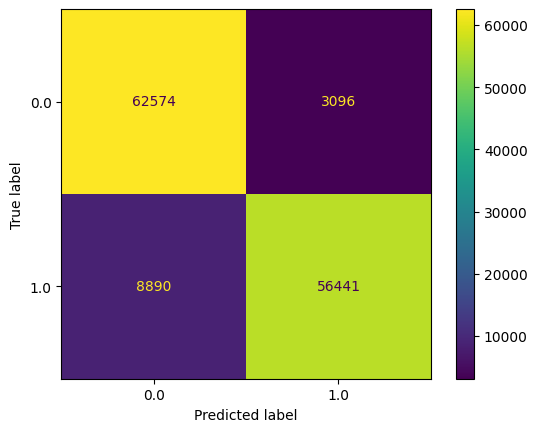

In [ ]:
cm = confusion_matrix(y_test, y_test_pred, labels= clf_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_xgb.classes_)
disp.plot()
plt.show()

In [ ]:
print("Recall:")

# Calculo de recall en Train
train_recall = recall_score(y_train, y_train_pred)

# Calculo de recall en Test
test_recall = recall_score(y_test, y_test_pred)

print('% de recall sobre el set de entrenamiento:', train_recall)
print('% de recall sobre el set de evaluación:', test_recall)

print("Precisión:")

# Calculo de precisión en Train
train_precision = precision_score(y_train, y_train_pred)

# Calculo de precisión en Test
test_precision = precision_score(y_test, y_test_pred)

print('% de precisión sobre el set de entrenamiento:', train_precision)
print('% de precisión sobre el set de evaluación:', test_precision)

print("F1 Score:")

# Calculo de f1 score en Train
train_f1_score = f1_score(y_train, y_train_pred)

# Calculo de f1 score en Test
test_f1_score = f1_score(y_test, y_test_pred)

print('% de f1 score sobre el set de entrenamiento:', train_f1_score)
print('% de f1_score sobre el set de evaluación:', test_f1_score)

Recall:
% de recall sobre el set de entrenamiento: 0.8673228629503996
% de recall sobre el set de evaluación: 0.8639237115611271
Precisión:
% de precisión sobre el set de entrenamiento: 0.9512282537793803
% de precisión sobre el set de evaluación: 0.9479987234828762
F1 Score:
% de f1 score sobre el set de entrenamiento: 0.9073399200027349
% de f1_score sobre el set de evaluación: 0.9040106352308037


# Conclusion

Al implementar algoritmos de boosting (XGBoost, en este caso) dió mejores resultados que nuestros primeros algoritmos con un 91% de exactitud. Nuestro 2do mejor algoritmo seria el de Random Forest con un 89% de exactitud.